# K-Nearest Neighbor and Classification

- In this assignment, you will implment a K-Nearest Neighbors (KNN) classifier using the famous Iris dataset. 
- The Iris dataset is a classic machine learning benchmark consisting of 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The full description of the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/iris
- The goal of this assignment is to train a KNN classifier on the Iris dataset to predict the species of iris flower based on its four features.
- Only use the already imported libraries. 

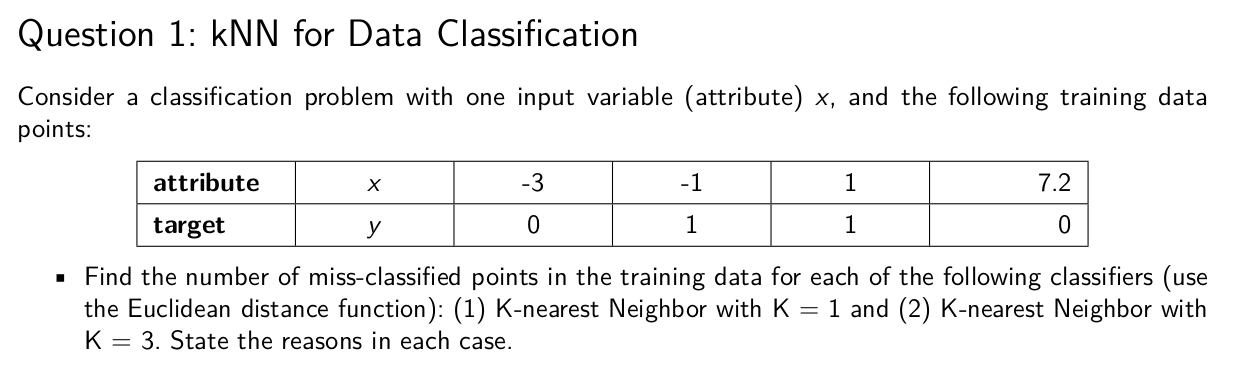

(1) Based on the Euclidean distance, point x = -1 has two nearest neighbour points x = -3, x = 1, whose targets are y = 0 and y = 1 respectively. As K = 1, x = -3 and x = 1 should have the same target. And point x = 7.2 should have target y = 1, since its nearest point is x = 1 which has y = 1. 

(2)For K = 3, the target will be classified according to the mojority class of three nearest neighbors. 
Therefore, x = -3 has y = 1.(x = -1, x = 1 both have y = 1; x = 7.2 has y = 0 -> mojority y = 1)
For the same reason, x = -1 has y = 1; x = 1 has y = 0; x = 7.2 has y = 1.  

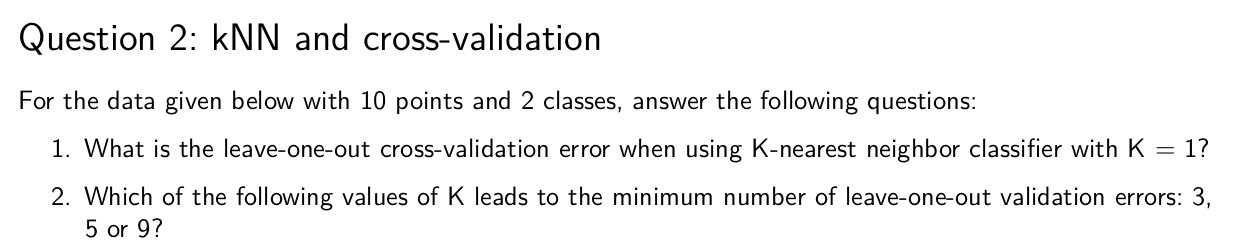
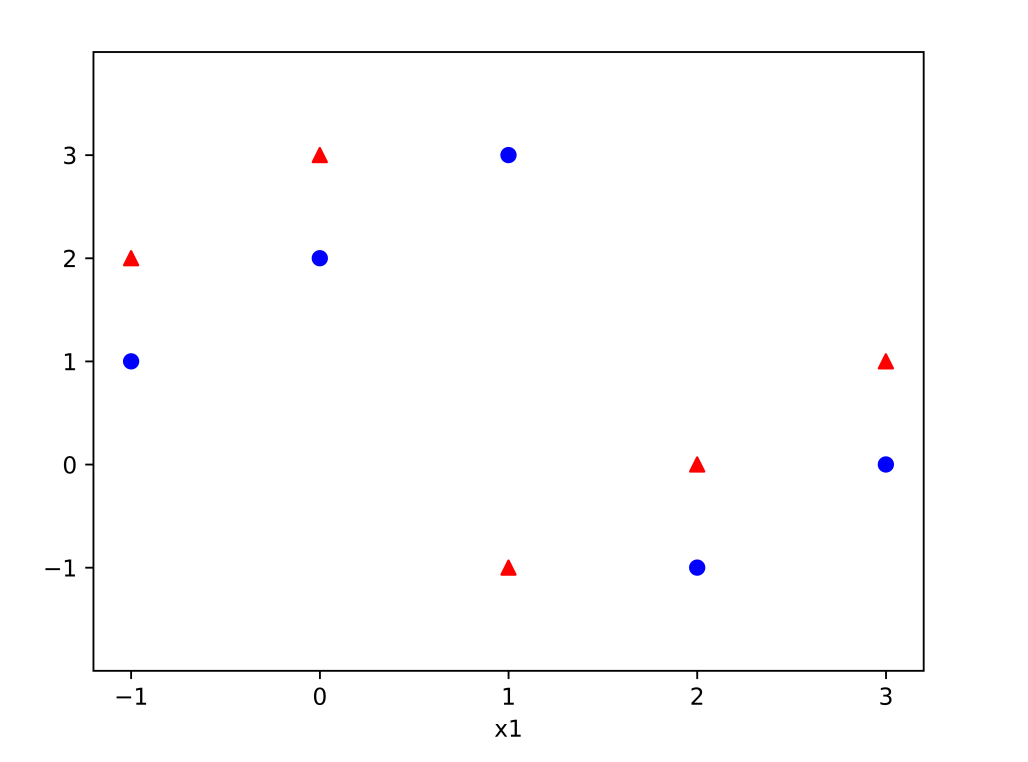

（1）In leave one out cross validation we hold each data point out in turn, train the model on the remaining. And then we see how our model performs on the held out data point. After we have gone through this process for each held out point, the final score is the proportion of points that were classified correctly when held out.
When K = 1, regardless of which point is selected, the nearest point is always different with it. So the leave one out cross validation is 1.

(2) K = 3: error = 1;
    K = 5: error = 1;
    K = 9: error = 1.

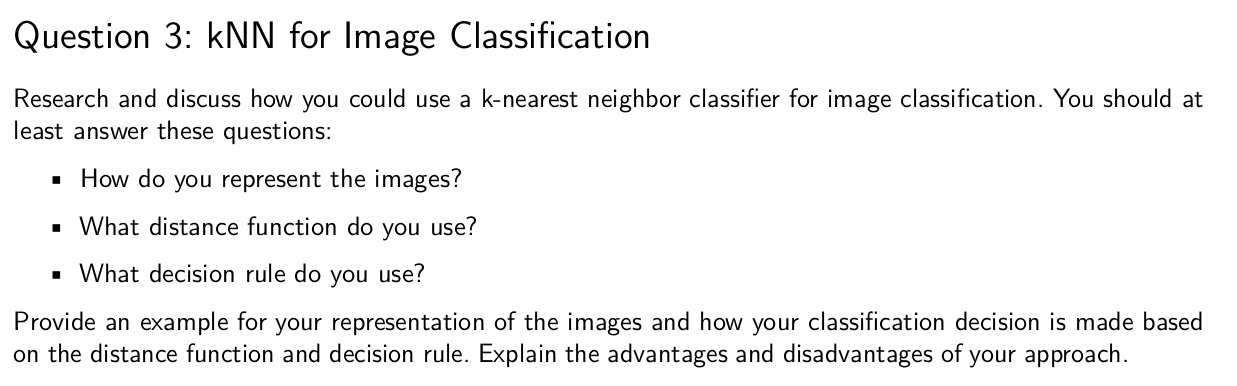

(1) Images can be represented by feature vectors. For example, a grey 2 * 2 image can be represented as a vector of 4 pixel values. And a RGB colour image can be represented as a vector of 12 values.
(2) Euclidean Distance, Manhattan distance or Mahalanobis distance can be used for vectors of grey images.
(3) Majority rule can be used.
(4) Advantages: simple, low cost;
    Disadvantages: sensitive to the choice of K and distance we choice.


**In this assignment, you will implement the KNN algorithm using Python and the scikit-learn library.**

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline

# You will start by loading and exploring the Iris dataset

**Load the Iris dataset**

In [156]:
# Load the iris dataset, from UCI Machine Learning Repository
# define X and Y, such that X --> features and Y --> labels
# datasets installed many datasets, one of them is iris.
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(type(iris))

print(X.shape)
print(y.shape)

<class 'sklearn.utils._bunch.Bunch'>
(150, 4)
(150,)


**Print Feature Names**

In [157]:
# print dataset column names
for k in iris:
    print(k)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [158]:
# print feature names (variable names)
print(iris.feature_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Print Labels**

In [159]:
# print unique labels
# discard the repeat numbers in array and order it
print(np.unique(iris.target))

[0 1 2]


**Create a pandas dataframe using the given data and target, and subsequently name the columns of the dataframe with the target names.**

In [160]:
# your solution should go here

# data = {}
# for i,feature in enumerate(iris.feature_names):
#     data[feature] = X[:,i]
# df = pd.DataFrame(data)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


**Now add the iris type from the irs_data['target']**

In [161]:
# your solution should go here
df['Iris Type'] = y
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Iris Type  
0         

**Now augment your dataset with a column "Iris name", this column should contain the Iris name ('sentosa', 'versicolor', 'virginica') based on the Iris type**

| Iris Type | Iris Name |
| --- | --- | 
| 0 | sentosa |
| 1 | versicolor |
| 2 | virginica |

In [162]:
# your solution should go here
name_dict = {}
print(iris.target_names)
for i, name in enumerate(iris.target_names):
    name_dict[i] = name
df['Iris Name'] = df['Iris Type'].map(name_dict)
df

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Type,Iris Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


**Now print some basic statistical details like percentile, mean, std, etc. of the dataset.**

In [163]:
# your solution should go here
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Now group data instances by their type to  better refine information**

In [164]:
# your solution should go here
groups = df.groupby('Iris Name')
print(groups.size())

Iris Name
setosa        50
versicolor    50
virginica     50
dtype: int64


What can you deduce from the above output?

We can see that there are three groups, namely 'setosa', 'versicolor', and 'virginica', and each group contains 50 instances. That means the dataset is balanced, which is good for training.


# Data visualization:
**Create four violin plots that represent the data features for each iris type, with the iris name as the x-axis and the data feature as the y-axis**

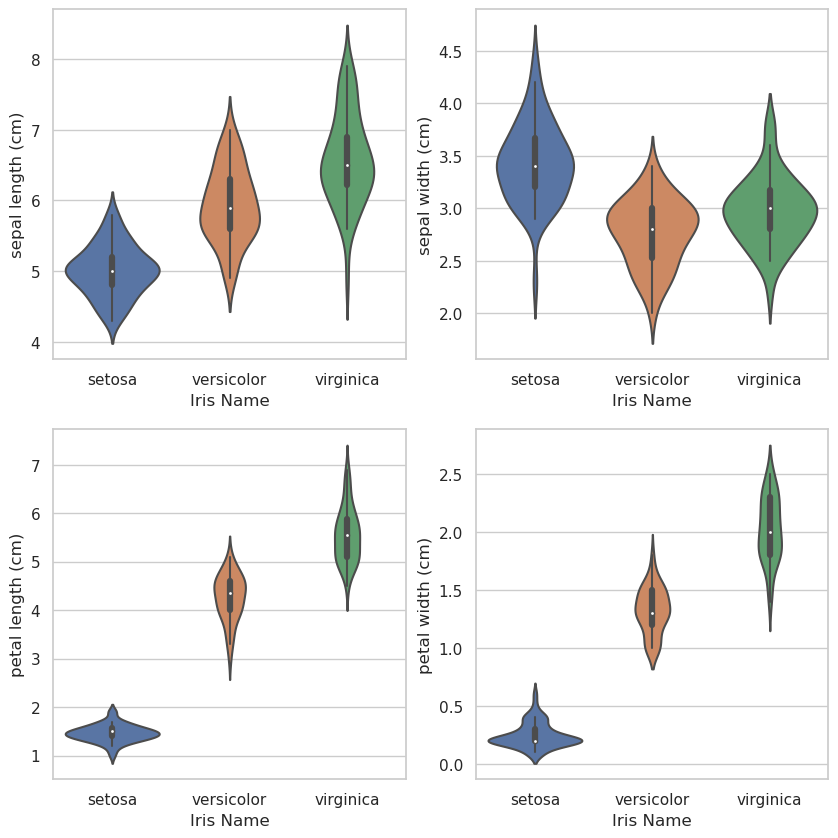

In [165]:
# your solution should go here

# Create four violin plots that represent the data features for each iris type
sns.set(style="whitegrid")

# Create a figure with four subplots arranged in two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Create a violin plot for each feature and iris type, and add it to the corresponding subplot
sns.violinplot(x="Iris Name", y="sepal length (cm)", data=df, ax=axs[0][0])
sns.violinplot(x="Iris Name", y="sepal width (cm)", data=df, ax=axs[0][1])
sns.violinplot(x="Iris Name", y="petal length (cm)", data=df, ax=axs[1][0])
sns.violinplot(x="Iris Name", y="petal width (cm)", data=df, ax=axs[1][1])

# Show the plots
plt.show()

**Using the seaborn library, create a pairplot of the iris dataset, with the following specifications:**

**- Use the 'Iris name' column to distinguish between the different types of iris.**

**- Display the scatterplots for the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)' columns only (set the 'vars' parameter accordingly).**



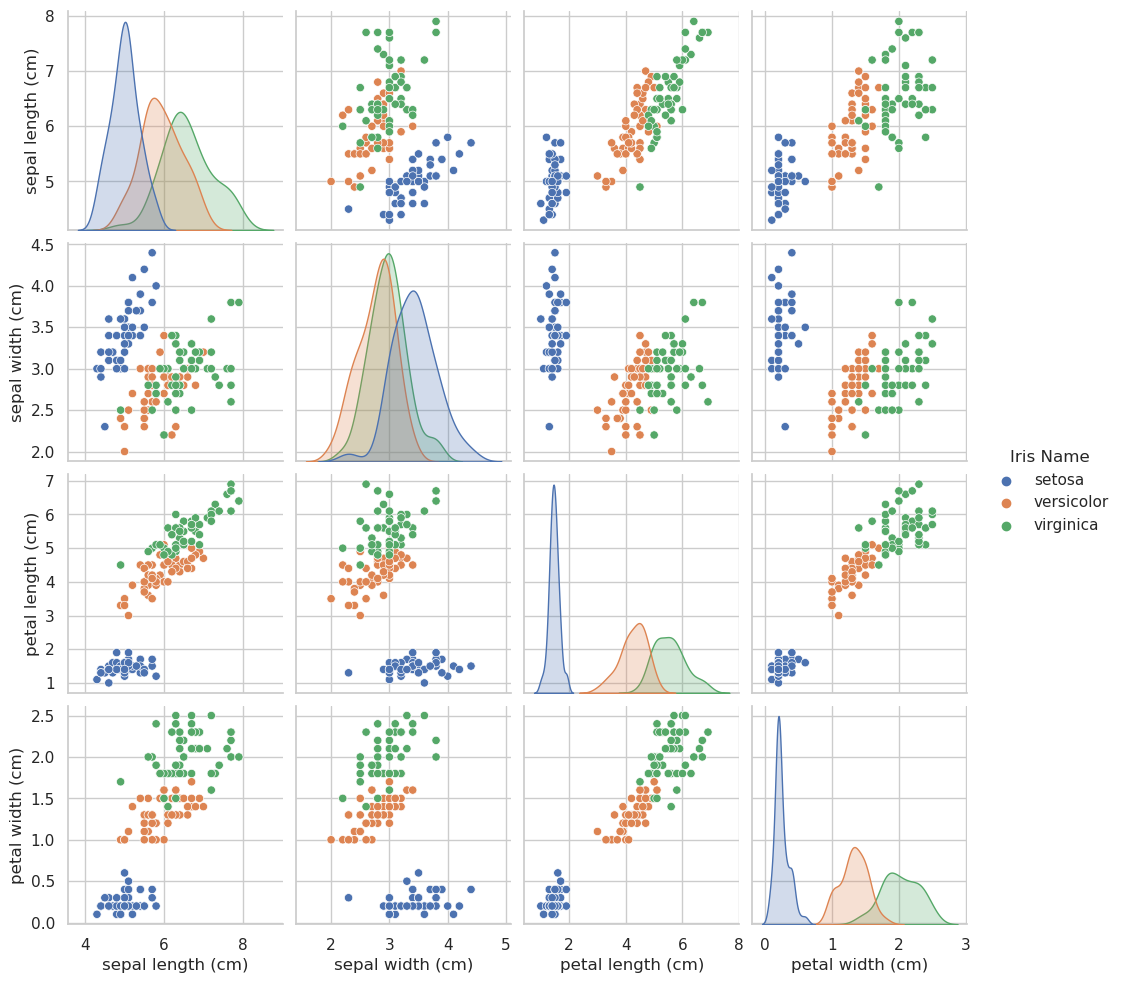

In [166]:
# your solution should go here

sns.pairplot(df, hue="Iris Name", vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])

plt.show()

**Produce a heatmap above to find out the correlations between the measurements**

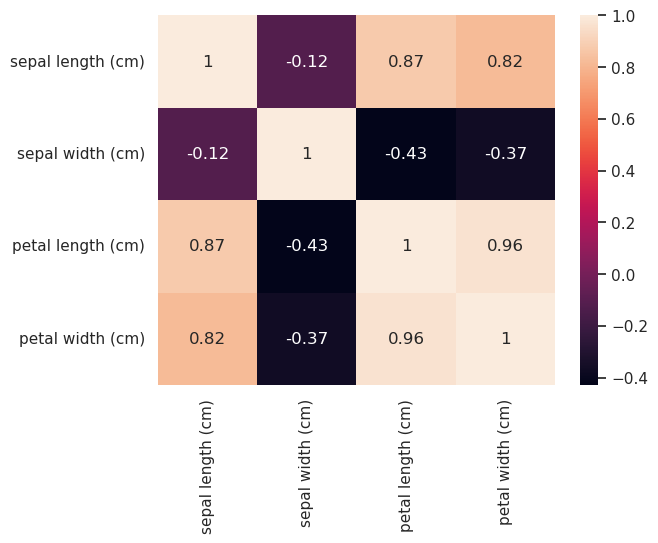

In [167]:
# your solution should go here

# Create a correlation matrix
corr_matrix = df.drop(['Iris Type','Iris Name'], axis=1).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

# K-Nearest Neighbor for Iris dataset classification
The KNN algorithm is a simple and effective classification technique that belongs to the family of lazy learning methods. It works by computing the distances between the input data point and all the training data points in the feature space. Then, the algorithm selects the K-nearest neighbors of the input point based on their distances, and assigns the majority class of these neighbors as the predicted class of the input point. The value of K is a hyperparameter that can be tuned to achieve better accuracy on the test set.

**Now split the dataset to X (data features) and Y (labels)** 

In [168]:
# your solution should go here
X = df.drop(['Iris Type', 'Iris Name'], axis=1)
Y = df['Iris Type']
X,Y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

**Now split it into training and test sets, the test set should be 20% of the original dataset.**

In [169]:
# your solution should go here
# random_state: seed 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train)
print(Y_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                 4.6               3.6                1.0               0.2
15                 5.7               4.4                1.5               0.4
65                 6.7               3.1                4.4               1.4
11                 4.8               3.4                1.6               0.2
42                 4.4               3.2                1.3               0.2
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[120 rows x 4 columns]
22     0
15     0
65     1
11     0
42  

**Normalize the dataset**

In [170]:
# your solution should go here
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Step 1 (Euclidean Distance):
- To compute the distances between the input data point and all the training data points in the feature space, we need to implement the distance function
- Implement a function to calculate the Euclidean distance between two data points 

In [171]:
def distance_ecu(x_train, x_test_point):
    """
    Input:
        - x_train: corresponding to the training data
        - x_test_point: corresponding to the test point

    Output:
        -distances: The distances between the test point and each point in the training data.

    """
    # your solution should go here
    
    distances = np.zeros(len(x_train))
#     print(x_train[1])
    for i, x_train_point in enumerate(x_train):
#         print(x_train_point)
        distances[i] = np.sqrt(np.sum((x_train_point - x_test_point)**2))
        
    return distances


# Step 2 (Find the nearest neighbors):
- Implement a function to compute the K nearest neighbors to a single data point

In [172]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """
    # your solution should go here
    # print(F"distance_point: {distance_point}")
    # Sort points according to the distances return the corresponding index    
    sorted_point = np.argsort(distance_point)
    # print(F"sorted_points: {sorted_point}")

    # Choose the first K neighbors
    df_nearest = sorted_point[:K]
    # print(F"df_nearest: {df_nearest}")
    return df_nearest


# Step 3 (Classify the point based on a majority vote):
- Implement a function to assign the label to a data point based on the majority vote of the K nearest neighbors

In [173]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """
    # your solution should go here
    
    # print(F"y_train: {y_train}")
    labels = y_train[df_nearest]
    counter = Counter(labels)
    most_counter = counter.most_common()[0]
    y_pred = most_counter[0]
    
    
    return y_pred

# Step 4 Full Algorithm:
- Implement a function to combine the helper functions you implemented previously

In [174]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """
    # your solution should go here
    
    y_pred = []
    
    for x_test_point in x_test:
        # Calculate the distances 
        distances = distance_ecu(x_train, x_test_point)

        # Find the K nearest neighbors
        df_nearest = nearest_neighbors(distances, K)

        # Assign the label to the test point based on the majority vote of the K nearest neighbors
        y_pred_point = voting(df_nearest, y_train)

        # Append the prediction to the list of predictions
        y_pred.append(y_pred_point)

    return y_pred  

**Test the KNN Algorithm on the test dataset using K = 3**

In [175]:
# your solution should go here
Y_pred = KNN_from_scratch(X_train, Y_train, X_test, K=3)
print(Y_pred)


[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0]


**Evaluate the performance of your implemented classifier by computing the accuracy**

In [176]:
# your solution should go here
Y_pred = np.array(Y_pred)
correct = np.sum(Y_test == Y_pred)
total = Y_test.shape[0]
acc = correct / total
print(acc)

0.9666666666666667


**Implement a functoin to perform Hyper-parameter Tuning using K-fold Cross Validation**

In [177]:
# you can choose any suitable range for k (example: list(range(1,30,2) )
# your solution should go here
def Hyper_parameter(K):
    Y_pred = KNN_from_scratch(X_train, Y_train, X_test, K)
    Y_pred = np.array(Y_pred)
    correct = np.sum(Y_test == Y_pred)
    total = Y_test.shape[0]
    acc = correct / total
    return acc
    

**To evaluate the performance of your implemented classifier with different values of K:**

**- Compute the accuracy of the classifier for each K**

**- Compute the best accuracy**


In [178]:
# your solution should go here
K_list = []
acc_list = []
best_acc = 0
for K in range(1,30,2):
    K_list.append(K)
    acc = Hyper_parameter(K)
    acc_list.append(acc)
    if acc > best_acc:
        best_acc = acc
    print('K=', K, 'acc=', acc)

K= 1 acc= 0.9666666666666667
K= 3 acc= 0.9666666666666667
K= 5 acc= 1.0
K= 7 acc= 1.0
K= 9 acc= 1.0
K= 11 acc= 0.9666666666666667
K= 13 acc= 0.9666666666666667
K= 15 acc= 1.0
K= 17 acc= 1.0
K= 19 acc= 1.0
K= 21 acc= 1.0
K= 23 acc= 0.9666666666666667
K= 25 acc= 0.9666666666666667
K= 27 acc= 0.9666666666666667
K= 29 acc= 0.9666666666666667


In [179]:
# your solution should go here
print(best_acc)

1.0


# Step 5 Visualize the performance of you classifier:
- Create a line graph to visualize the performance of your KNN classifier with different values of K, using the accuracy list as the y-values and the range of K value as the x-values.

- Your graph should have a title and labels for the x-axis and y-axis.

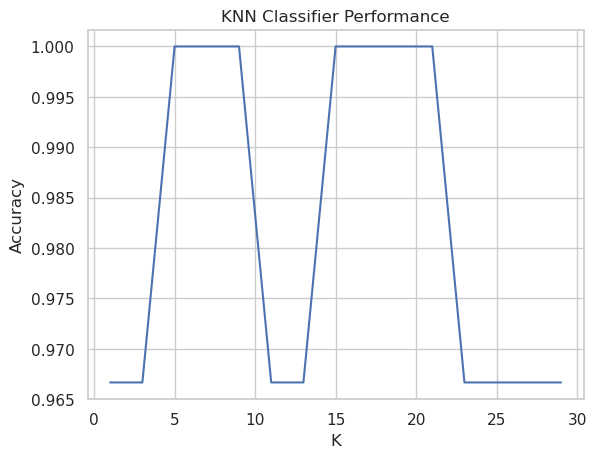

In [180]:
# your solution should go here
plt.plot(K_list, acc_list)
plt.title('KNN Classifier Performance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()